In [1]:
import os
import shutil
from tqdm.notebook import tqdm as tqdm
from PIL import ImageFont, ImageDraw, Image
from IPython.display import display
from IPython.display import Image as im
import numpy as np
import matplotlib.pyplot as plt
import ipyplot
import cv2
%matplotlib inline

In [2]:
rootDirectory = r'F:\SPAD_for_DiffusionModel\groundTruth'

In [3]:
Test='Test_groundTruth'
Train='Train_groundTruth'

In [4]:
def makeDirectory(folderName,rootAddress=rootDirectory):
    directoryName=folderName
    directoryFullName=os.path.join(rootAddress, directoryName)

    if not os.path.exists(directoryFullName):
        os.makedirs(directoryFullName)
    else:
        shutil.rmtree(directoryFullName)           # Removes all the subdirectories!
        os.makedirs(directoryFullName)
    return directoryFullName

In [5]:
TestDir=makeDirectory(Test,rootDirectory)
TrainDir=makeDirectory(Train,rootDirectory)

In [6]:
rawImageName='groundTruthFiltered.jpg'
imageFullName=os.path.join(rootDirectory, rawImageName)      
image = cv2.imread(imageFullName, cv2.IMREAD_COLOR)
imageShape=image.shape

Test Shape: (256, 256, 3) Train Shape: (256, 256, 3)


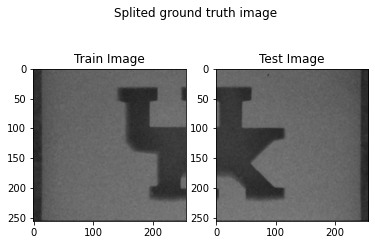

In [7]:
imageTrain=image[:,:int(imageShape[1]/2),:]
imageTest=image[:,int(imageShape[1]/2):,:]
print('Test Shape:',imageTest.shape, 'Train Shape:',imageTrain.shape)
fig, axs = plt.subplots(nrows=1,ncols=2)
axs[0].imshow(cv2.cvtColor(imageTrain, cv2.COLOR_BGR2RGB))
axs[0].set_title('Train Image')
axs[1].imshow(cv2.cvtColor(imageTest, cv2.COLOR_BGR2RGB))
axs[1].set_title('Test Image')
fig.suptitle('Splited ground truth image')
plt.show() 

In [8]:
imageTestX,imageTestY,_=imageTest.shape
imageTrainX,imageTrainY,_=imageTrain.shape
PixelsX=64
deltaX=32
PixelsY=64
deltaY=32

In [9]:
testImages = [imageTest[x:x+PixelsX,y:y+PixelsY] for x in range(0,imageTestX-PixelsX,deltaX) \
                  for y in range(0,imageTestY-PixelsY,deltaY)]
    
trainImages = [imageTrain[x:x+PixelsX,y:y+PixelsY] for x in range(0,imageTrainX-PixelsX,deltaX) \
                   for y in range(0,imageTrainY-PixelsY,deltaY)]
    
testImageNames = ['x_'+'{:05}'.format(x)+'_y_'+'{:05}'.format(y) for x in range(0,imageTestX-PixelsX,deltaX) \
                  for y in range(0,imageTestY-PixelsY,deltaY)]
    
trainImageNames = ['x_'+'{:05}'.format(x)+'_y_'+'{:05}'.format(y) for x in range(0,imageTrainX-PixelsX,deltaX) \
                   for y in range(0,imageTrainY-PixelsY,deltaY)]

In [10]:
imageType='.jpg'

# Test
for ii in range(len(testImages)):
    namePrefix=testImageNames[ii]
    imageName=os.path.join(TestDir, (namePrefix +'_Test' + imageType))
    cv2.imwrite(imageName, testImages[ii])

In [11]:
for ii in range(len(trainImages)):
    namePrefix=trainImageNames[ii]
    imageName=os.path.join(TrainDir, (namePrefix +'_Train' + imageType))
    cv2.imwrite(imageName, trainImages[ii])